In [1]:
%pip install easyocr opencv-python matplotlib


  Using cached opencv_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached pillow-11.0.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (9.1 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 10.0 MB/s eta 0:00:00a 0:00:01
Using cached opencv_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (62.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 10.6 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 10.5 MB/s eta 0:00:00a 0:00:01
Using cached kiwisolver-1.4.7-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/1

In [3]:
import easyocr

# Create an OCR reader object
reader = easyocr.Reader(['en'])

# Read text from an image
result = reader.readtext('/home/adrian/KYC-application/images/CI_Specimen2.jpg')


# Print the extracted text
for detection in result:
    print(detection[1])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


ROUMANIE
JO
MAM
ROMANIA
Didertite
Cartep
PRe
"R ooooooe
ioenad
CNP
oooooooooooT
R69o0
'hom
nn
VASILE
cnommrir
IONESCU
Gatotonlo Natlonallto
Vonait
Sex [Saxe S0r
Romana
ROU
LOC
Lieu do
lacu;
~birtn
SPECIMEN SPECIMEN
Domicllluladres9
Woo
SPECIMEN
SPECIMEN
580
PH
Emtsa delDeli
parikasued
O0.00.00-00.00.0O00
alabiltaloy
S.PCLEP_
IdRoU<<<<<<<SPECIMEN<<<<<<<<<<<<<<
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


In [26]:
import easyocr
import cv2
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

def annotate_and_plot_image(image_path):
    # Initialize the EasyOCR reader
    reader = easyocr.Reader(['en'])

    # Read the input image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Error reading the image. Check the file path.")
    
    # Convert the image to RGB (for annotation)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Perform OCR
    results = reader.readtext(image_path, x_ths=1.5, y_ths=1.5, decoder = 'wordbeamsearch', rotation_info = [90, 180, 270])
    
    # Load the image into PIL for annotation
    annotated_image = Image.fromarray(image_rgb)
    draw = ImageDraw.Draw(annotated_image)

    # Optional: Load a font for better text rendering
    try:
        font = ImageFont.truetype("arial.ttf", size=20)  # Adjust size as needed
    except IOError:
        font = ImageFont.load_default()

    # Draw bounding boxes and text
    for (bbox, text, prob) in results:
        # Extract the bounding box coordinates
        (top_left, top_right, bottom_right, bottom_left) = bbox
        top_left = tuple(map(int, top_left))
        bottom_right = tuple(map(int, bottom_right))

        # Draw the bounding box
        draw.rectangle([top_left, bottom_right], outline="red", width=2)

        # Annotate with the detected text
        draw.text(top_left, text, fill="blue", font=font)

    # Print the detected text
    for _, text, prob in results:
        print(f"{text} {prob:.2f}")

    # Plot the annotated image
    plt.figure(figsize=(10, 10))
    plt.imshow(annotated_image)
    plt.axis('off')  # Turn off axis
    plt.show()

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Processing: /home/adrian/KYC-application/images/CI_Specimen5.png


/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:221: RuntimeWarning: overflow encountered in scalar add
  curr.entries[labeling].prTotal += prBlank + prNonBlank
/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:249: RuntimeWarning: overflow encountered in scalar add
  curr.entries[newLabeling].prTotal += prNonBlank
/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:248: RuntimeWarning: overflow encountered in scalar add
  curr.entries[newLabeling].prNonBlank += prNonBlank
/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:219: RuntimeWarning: overflow encountered in scalar add
  curr.entries[labeling].prNonBlank += prNonBlank


RONIAIA 0.19
ROUMANIE 1.00
ROMANIA 0.95
CARTE DE IDENTITATE 0.98
1 0.41
4 0.34
280518 0.71
MC 0.94
NR 1.00
SERIA 1.00
180528000000 0.99
CNP 1.00
Nume/Nom/Last name 0.68
MAIER 0.74
PrenumelPrenomiFirst name 0.60
CONSULTANTS 1.00
Cetatenie/Nationalite/National 0.91
xas/axasixas 0.68
Romana 1.00
ROU 1.00
3 0.99
naissance Place 0.69
of birth 0.97
Loc nastere/Lieu de 0.96
London United Kingdom 0.92
Domiciliu/Adress 0.62
53 Fountain St, Manchester 0.86
M2 2AN , 0.72
United Kingdom 1.00
Valabilitate/Validite/Valid 0.64
Emisa de /Delivree par/lssued by 0.75
MAIER Consultants 0.88
30.12.09-31.12.2019 0.69
IDROUMAIER<<CONS 0.16
MC280518<1R0U1805 0.91


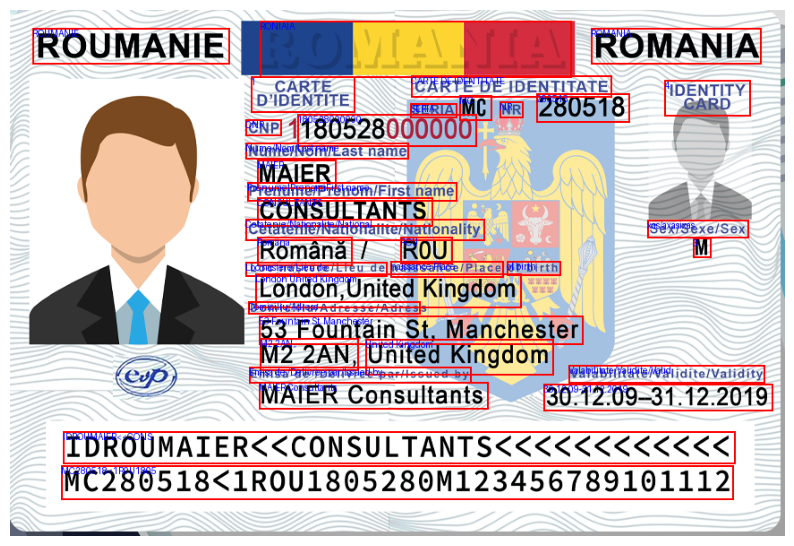

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Processing: /home/adrian/KYC-application/images/CI_Specimen6.png


/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:221: RuntimeWarning: overflow encountered in scalar add
  curr.entries[labeling].prTotal += prBlank + prNonBlank
/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:248: RuntimeWarning: overflow encountered in scalar add
  curr.entries[newLabeling].prNonBlank += prNonBlank
/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:249: RuntimeWarning: overflow encountered in scalar add
  curr.entries[newLabeling].prTotal += prNonBlank
/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:219: RuntimeWarning: overflow encountered in scalar add
  curr.entries[labeling].prNonBlank += prNonBlank


ROMANA 0.95
ROUMANIE 1.00
ROMANIA 1.00
4 0.48
CARTE 1.00
CARTE DE 0.98
p 0.98
D'IDENTITE 0.98
SERIA RX 0.93
620222400084 1.00
CNP 1.00
2413Q 0.82
NumelNom/Last name 0.58
TITA 0.98
Prenume/Pronom/First name 0.57
GICU-ROMEO 1.00
Cetatenie/NatlonalitelNatio 0.87
Sex/Soxe/Sex 0.94
Romana 1.00
ROU 1.00
Loc nastere/Liou de naissance Place of birth 0.75
Mun Bucuresti Sec  0.67
Domiciliu/Adresse/Address 0.98
Mun Bucuresti Sec.6 0.96
Bld Timisoara nr.43 bLP13 sc.8 ap.142 0.53
847 1.00
Emisa de/Delivree parlIssued by 0.57
Valabilitate/Validite/ Validily 0.68
S.P.CEP. Sector 6 0.58
04.03.16-22.02.2026 1.00
IDRoUtITA<<GICU 0.32
RX868048<4R0u6202220m 0.89


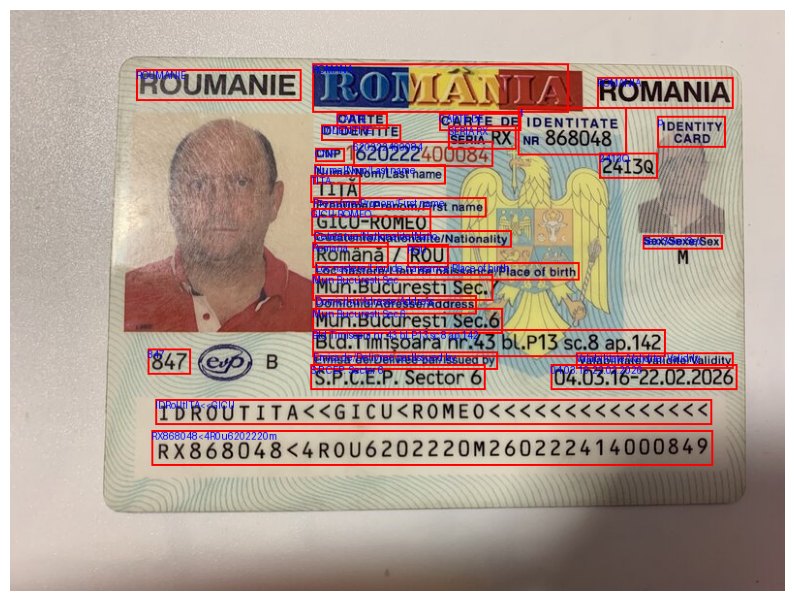

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Processing: /home/adrian/KYC-application/images/CI_Specimen1.png


/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:221: RuntimeWarning: overflow encountered in scalar add
  curr.entries[labeling].prTotal += prBlank + prNonBlank
/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:248: RuntimeWarning: overflow encountered in scalar add
  curr.entries[newLabeling].prNonBlank += prNonBlank
/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:249: RuntimeWarning: overflow encountered in scalar add
  curr.entries[newLabeling].prTotal += prNonBlank
/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:219: RuntimeWarning: overflow encountered in scalar add
  curr.entries[labeling].prNonBlank += prNonBlank
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


y1 must be greater than or equal to y0
Processing: /home/adrian/KYC-application/images/CI_Specimen2.jpg


/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:221: RuntimeWarning: overflow encountered in scalar add
  curr.entries[labeling].prTotal += prBlank + prNonBlank
/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:248: RuntimeWarning: overflow encountered in scalar add
  curr.entries[newLabeling].prNonBlank += prNonBlank
/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:249: RuntimeWarning: overflow encountered in scalar add
  curr.entries[newLabeling].prTotal += prNonBlank
/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:219: RuntimeWarning: overflow encountered in scalar add
  curr.entries[labeling].prNonBlank += prNonBlank


ITA 0.22
ROUMANIE 1.00
ROMANIA 0.91
Da 0.57
0 0.58
4 0.97
J 0.81
a 0.65
p 0.77
L 0.39
00694 0.99
8 0.99
{ 0.27
0 0.39
VASILE 1.00
1 0.30
IONESCU 1.00
1 0.56
L 0.42
1 0.61
nod 0.89
Romana 1.00
1 0.37
8 0.37
Lieu do 0.70
9 0.86
SPECIMEN SPECIMEN 1.00
Domicllluladres9 0.27
D 0.36
SPECIMEN 1.00
SPECIMEN 1.00
1 0.77
oooo*0o*00-00*00*00 0.25
580 1.00
PH 0.99
1 0.70
1 0.19
S.PCLEP 0.87
IdRoU<<<<<<<SPECIMEN<<<<<<<< 0.51
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< 0.33


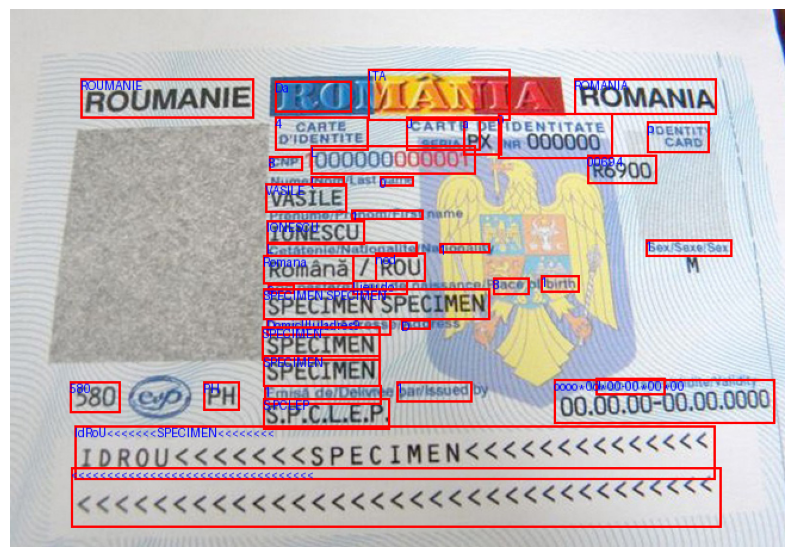

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Processing: /home/adrian/KYC-application/images/CI_Specimen4.jpg


/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:221: RuntimeWarning: overflow encountered in scalar add
  curr.entries[labeling].prTotal += prBlank + prNonBlank
/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:248: RuntimeWarning: overflow encountered in scalar add
  curr.entries[newLabeling].prNonBlank += prNonBlank
/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:249: RuntimeWarning: overflow encountered in scalar add
  curr.entries[newLabeling].prTotal += prNonBlank


MANIA 0.85
ROUMANIE 1.00
3 0.99
ROMANIA 1.00
1 0.58
p 0.88
4 0.98
1 0.76
1 0.44
2410415400342 0.76
DOJE6 0.45
VASILESCU 1.00
1 0.65
ELENA 0.95
Gulutunie 0.07
Romana 0.99
ROU 1.00
1 0.74
1 0.65
Mun: Bucur 0.92
Sec: 0.97
Iorga 0.82
Str: Nicolae 0.79
8 1.00
06.01.17-15.04.2077 0.60
DEPABD 0.99
IDROUVASILEScU<<E 0.61
Ss099994<OR0u4104 0.35


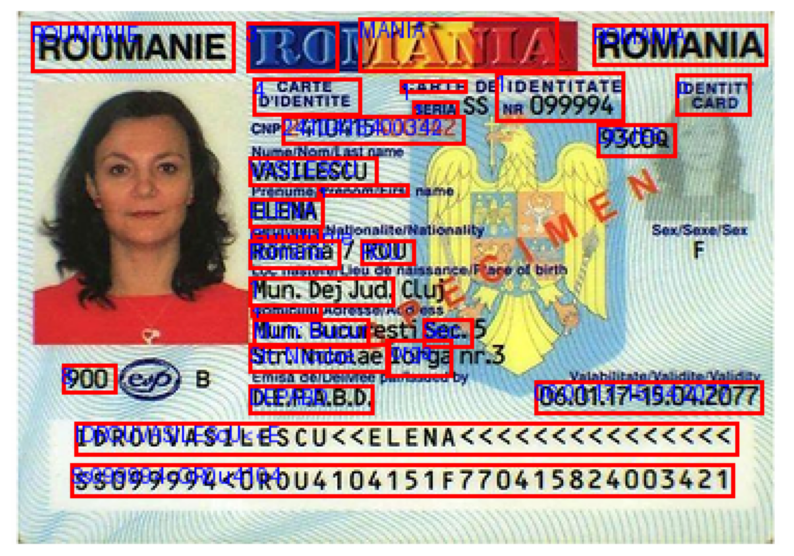

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Processing: /home/adrian/KYC-application/images/CI_Specimen7.png


/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:249: RuntimeWarning: overflow encountered in scalar add
  curr.entries[newLabeling].prTotal += prNonBlank
/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:248: RuntimeWarning: overflow encountered in scalar add
  curr.entries[newLabeling].prNonBlank += prNonBlank
/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:221: RuntimeWarning: overflow encountered in scalar add
  curr.entries[labeling].prTotal += prBlank + prNonBlank
/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:219: RuntimeWarning: overflow encountered in scalar add
  curr.entries[labeling].prNonBlank += prNonBlank


ROMAWL 0.25
ROUMANIE 1.00
ROMANIA 1.00
CARTE DE IDENTITATE 0.64
CARTE 0.99
identity 0.91
777881 0.69
D'IDENTITE 0.69
CARD 0.91
SERIA AX 1.00
3 1.00
5020501015564 0.72
CNP 1.00
95D2F 0.95
Nume/Nom/Last name 0.64
BALEA 1.00
PrenumefPrenomfFir name 0.59
CRISTIAN-CONSTANTIN 0.91
Sex/Sexe/Sex 0.63
Cetatenle/Nationalite 0.62
euewod 0.96
ROU 1.00
M 1.00
Loc nastereLieu de naissance Place ol birth 0.64
Jud.AB Ors Abrud 0.82
Domiciliu/AdresselAd 0.37
Jud.AB Sat Carpinis (Com Rosia Montana) 0.78
nr.770A 0.79
8 1.00
AB 0.99
Emisa delDelivree parllssued Dy 0.53
Valabilitate Validite Validity 0.55
29.05.20-01.05.2027 0.97
SPCLEP Abrud 0.97
ID ROUBALEA<<C RISTIAn<CONSTA < 0.33
Ax777881<3R0U020 0.86


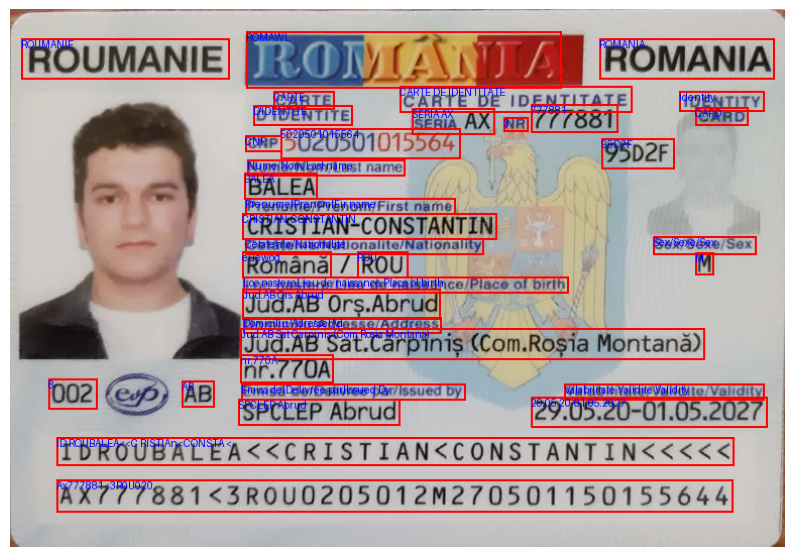

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Processing: /home/adrian/KYC-application/images/CI_Specimen3.jpg


/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:249: RuntimeWarning: overflow encountered in scalar add
  curr.entries[newLabeling].prTotal += prNonBlank
/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:248: RuntimeWarning: overflow encountered in scalar add
  curr.entries[newLabeling].prNonBlank += prNonBlank
/home/adrian/KYC-application/.venv/lib/python3.12/site-packages/easyocr/utils.py:221: RuntimeWarning: overflow encountered in scalar add
  curr.entries[labeling].prTotal += prBlank + prNonBlank


"R841994E 0.50
1 0.23
p 0.98
4 0.94
SERIA 0.76
1640902220342 0.93
{ 0.80
2 0.77
Nume/Nom/Last name 0.65
DOE 1.00
renom/Firs 0.74
1 0.55
JOHN 0.95
Cetatenie/Nalionallte/l 0.18
SexiSexelSex 0.51
IROU 0.69
Romana 1.00
Coda 1.00
Ance 0.12
1 0.70
8 0.98
Domiciliu/ Adresse/Add 0.85
Ias 1.00
Jud 1.00
"unw 0.75
8 0.93
Str. Libertat 0.72
8 0.92
nr.22 1.00
8 0.53
ap.2 1.00
442 0.99
SI 1.00
L 0.44
alabilitato Validite Validity 0.37
1 0.77
1 0.73
IDROUDOE<<JOHN< <<<<<<<<<<<<<<<< 0.72
MX6419944R0u64090 0.69


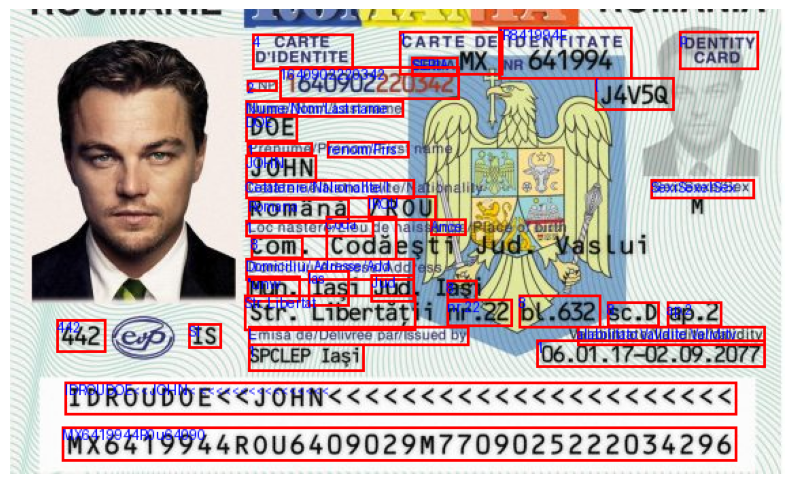

In [27]:
import os

folder_path = "/home/adrian/KYC-application/images"  
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)

    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        print(f"Processing: {file_path}")
        try:
            annotate_and_plot_image(file_path)
        except ValueError as e:
            print(e)